<a href="https://colab.research.google.com/github/Kushvanth015/Data_Science/blob/main/A_B_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📊 Statistical Analysis of User Behavior through A/B Testing

#✅ 1. Import Libraries

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

#✅ Load Dataset

In [41]:
# Load dataset
data = pd.read_csv("/content/ab_test_data.csv")

data.head()

,user_id,group,converted
0,1,A,0
1,2,A,1
2,3,A,1
3,4,A,1
4,5,A,1


#✅ Step 3: Basic Analysis


In [42]:
# Conversion rate per group (mean of 'converted')
conversion_rates = data.groupby('group')['converted'].mean()
print("📊 Conversion Rates:\n", conversion_rates)

# Count of conversions per group
conversion_counts = data.groupby('group')['converted'].sum()
print("\n✅ Total Conversions:\n", conversion_counts)

# Total number of users per group
user_counts = data.groupby('group')['converted'].count()
print("\n👥 Total Users:\n", user_counts)

📊 Conversion Rates:
 group
A    0.190
B    0.122
Name: converted, dtype: float64

✅ Total Conversions:
 group
A    95
B    61
Name: converted, dtype: int64

👥 Total Users:
 group
A    500
B    500
Name: converted, dtype: int64


#✅ 4. Visualizations (Bar Plot & Pie Chart)

🔹 A. Bar Plot: Conversion Rate by Group

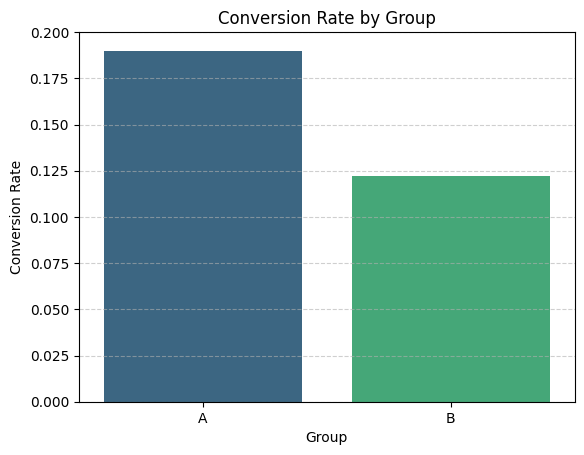

In [47]:

sns.barplot(
    x=conversion_rates.index,
    y=conversion_rates.values,
    hue=conversion_rates.index,
    palette='viridis',
    legend=False
)
plt.title("Conversion Rate by Group")
plt.ylabel("Conversion Rate")
plt.xlabel("Group")
plt.ylim(0, 0.2)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


🔹 B. Pie Charts: Converted vs Not Converted per Group

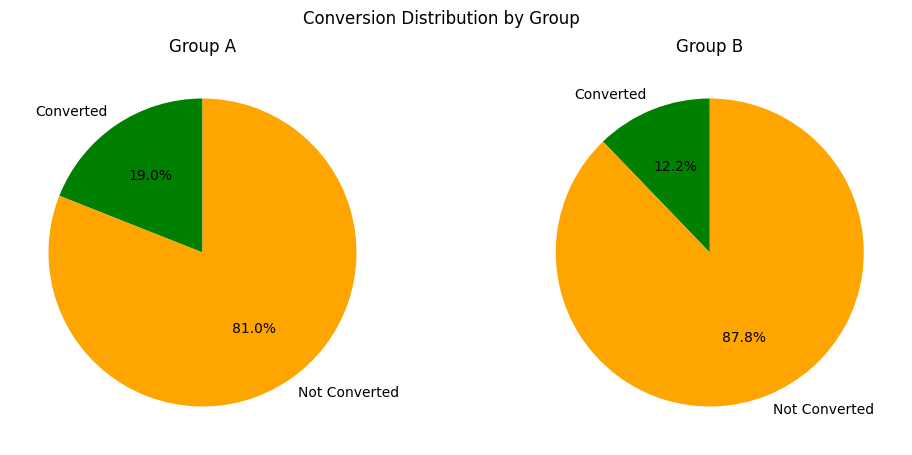

In [44]:
# Define labels and color order matching value 1 = Converted, 0 = Not Converted
labels = ['Converted', 'Not Converted']
colors = ['green', 'orange']

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, group in enumerate(['A', 'B']):
    # Get value counts sorted by index to ensure [0, 1] order
    group_data = data[data['group'] == group]['converted'].value_counts().sort_index()

    # Reorder data to [1, 0] → Converted first
    values = [group_data.get(1, 0), group_data.get(0, 0)]

    axes[i].pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
    axes[i].set_title(f'Group {group}')

plt.suptitle("Conversion Distribution by Group")
plt.show()


#✅ Step 5: Hypothesis Testing (Z-Test for Proportions)

In [45]:
from statsmodels.stats.proportion import proportions_ztest

# Prepare data for the z-test
successes = [conversion_counts['A'], conversion_counts['B']]  # Number of conversions
samples = [user_counts['A'], user_counts['B']]                # Total users

# Perform 2-proportion Z-test
z_stat, p_val = proportions_ztest(count=successes, nobs=samples)
print("\n📋 === A/B Test Z-Test Summary ===")
print(f"🧪 Z-Statistic: {z_stat:.3f}")
print(f"📉 P-Value: {p_val:.4f}")

# Set significance level
alpha = 0.05

# Conclusion with direction
if p_val < alpha:
    if (successes[0] / samples[0]) > (successes[1] / samples[1]):
        print("🎯 Conclusion: Group A performs significantly better ✅")
    else:
        print("🎯 Conclusion: Group B performs significantly better ✅")
else:
    print("❌ Conclusion: No significant difference between Group A and Group B")


📋 === A/B Test Z-Test Summary ===
🧪 Z-Statistic: 2.963
📉 P-Value: 0.0030
🎯 Conclusion: Group A performs significantly better ✅


#✅ 6. Summary Report

In [46]:
print("\n📋 === A/B Test Summary Report ===")
print(f"Group A Conversion Rate: {conversion_rates['A']:.2%}")
print(f"Group B Conversion Rate: {conversion_rates['B']:.2%}")
print(f"Z-Score: {z_stat:.3f}")
print(f"P-Value: {p_val:.4f}")

if p_val < alpha:
    # Compare which group has higher conversion
    if conversion_rates['B'] > conversion_rates['A']:
        print("🎯 Conclusion: Version B performs significantly better! ✅")
    else:
        print("🎯 Conclusion: Version A performs significantly better! ✅")
else:
    print("🔍 Conclusion: No significant difference between Group A and B ❌")


📋 === A/B Test Summary Report ===
Group A Conversion Rate: 19.00%
Group B Conversion Rate: 12.20%
Z-Score: 2.963
P-Value: 0.0030
🎯 Conclusion: Version A performs significantly better! ✅
